In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import skimage
IMG_DIR = 'img/'

In [22]:
BLENDING_RADIUS = 70

In [2]:
data = plt.imread('bunny_line.png')[:,:,0]
data.shape

(1024, 1024)

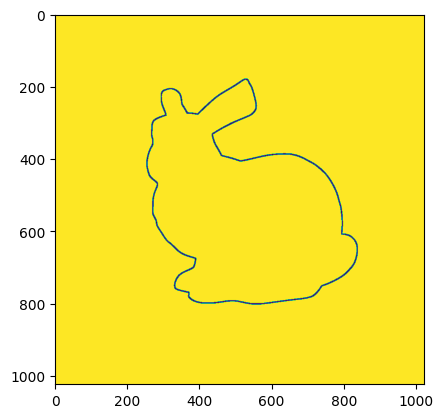

In [3]:
plt.imshow(data)

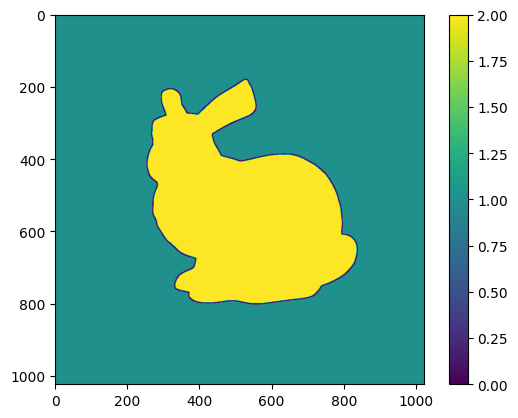

In [4]:
l = skimage.measure.label(data)
plt.imshow(l)
plt.colorbar()

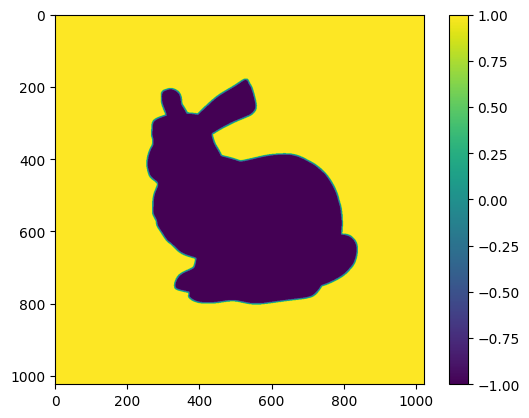

In [5]:
s = l
s[s == 2] = -1
plt.imshow(s)
plt.colorbar()

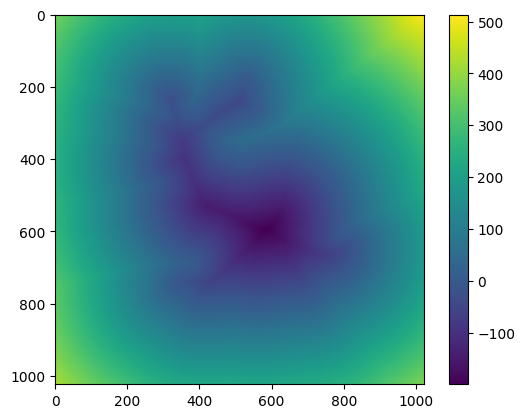

In [7]:
bunny_dist = scipy.ndimage.distance_transform_edt(data) * s
plt.imshow(bunny_dist)
plt.colorbar()

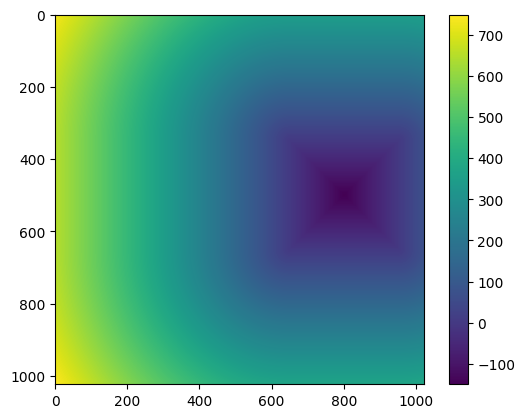

In [51]:
def sdBox(p,b):
    d = np.abs(p)-b
    return np.linalg.norm(np.maximum(d,0.0)) + np.minimum(np.max(d),0.0)

box_dist = np.zeros((1024,1024), dtype=np.float32)
c_x = 800
c_y = 500
b = np.array([ 150, 150 ])
for i in range(1024):
    for j in range(1024):
        p = np.array([ j-c_x, i-c_y ], dtype=np.float32)
        d = sdBox(p, b)
        box_dist[i,j] = d

plt.imshow(box_dist)
plt.colorbar()

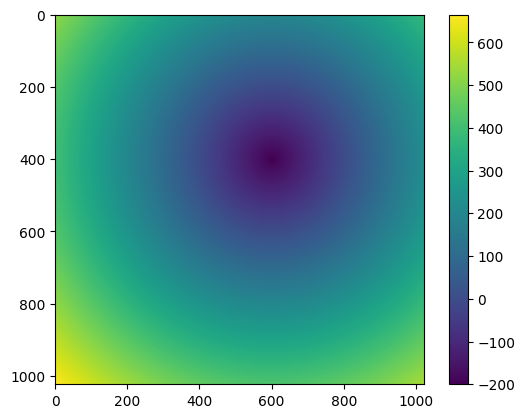

In [28]:
circle_dist = np.zeros((1024,1024), dtype=np.float32)
c_x = 600
c_y = 400
r = 200
for i in range(1024):
    for j in range(1024):
        dx = j - c_x
        dy = i - c_y
        d = np.sqrt(dx*dx + dy*dy)
        d -= r
        circle_dist[i,j] = d

plt.imshow(circle_dist)
plt.colorbar()

In [34]:
def smooth_min(a, b, k):
    d = np.abs(a-b)
    return np.minimum(a, b) - np.maximum(0, k-d)**2 / (4*k)

In [35]:
#dist = smooth_min(bunny_dist, box_dist, 30)
dist = np.minimum(bunny_dist, box_dist)

In [36]:
def dist_to_color(x):
    if x < 0:
        x = abs(x)
        if x < 5:
            return np.array([0.0, 0.0, 0.0], dtype=np.float32)
        elif x < 25:
            return np.array([77/255, 120/255, 255/255], dtype=np.float32)
        elif x < 45:
            return np.array([123/255, 157/255, 255/255], dtype=np.float32)
        elif x < 65:
            return np.array([187/255, 205/255, 255/255], dtype=np.float32)
        else:
            return np.array([1,1,1], dtype=np.float32)
    else:
        if x < 5:
            return np.array([0.0, 0.0, 0.0], dtype=np.float32)
        elif x < 25:
            return np.array([255/255, 84/255, 84/255], dtype=np.float32)
        elif x < 45:
            return np.array([255/255, 158/255, 158/255], dtype=np.float32)
        elif x < 65:
            return np.array([255/255, 199/255, 199/255], dtype=np.float32)
        else:
            return np.array([1,1,1], dtype=np.float32)

def compute_color(d):
    color = np.zeros((1024,1024,3), dtype=np.float32)
    it = np.nditer(d, flags=['multi_index'])
    for x in it:
        c = dist_to_color(x)
        if np.min(c) != 0 and (abs(bunny_dist[it.multi_index]) < 5 or abs(box_dist[it.multi_index]) < 5):
            #c = np.array([0.5, 0.5, 0.5])
            c *= 0.75
            pass
        color[it.multi_index] = c
    return color

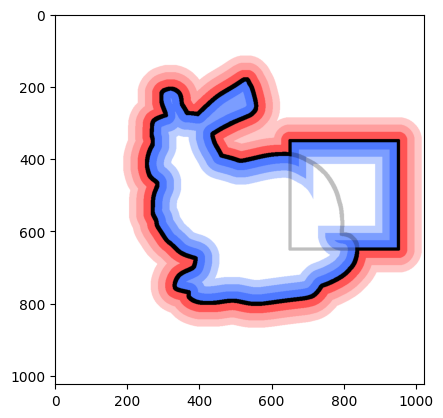

In [52]:
color = compute_color(np.minimum(bunny_dist, box_dist))
plt.imsave(IMG_DIR + 'union_sharp.png', color)
plt.imshow(color)

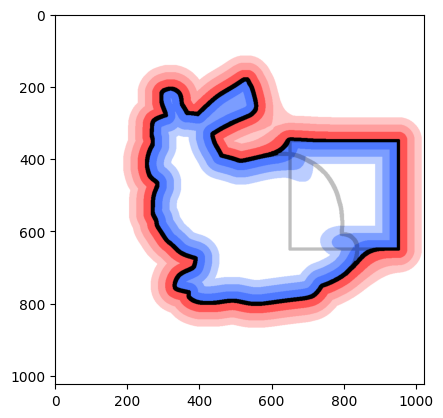

In [53]:
color = compute_color(smooth_min(bunny_dist, box_dist, 70))
plt.imshow(color)
plt.imsave(IMG_DIR + 'union_smooth.png', color)

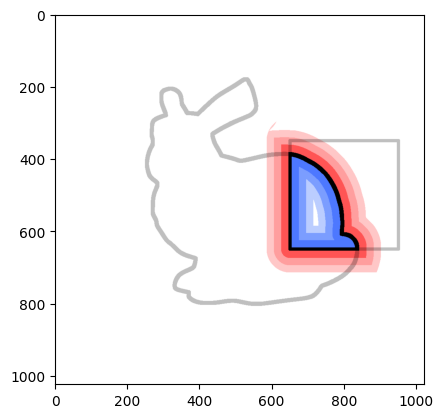

In [54]:
color = compute_color(np.maximum(bunny_dist, box_dist))
plt.imshow(color)
plt.imsave(IMG_DIR + 'inter_sharp.png', color)

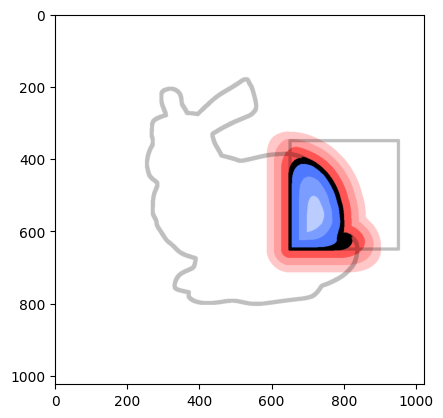

In [55]:
color = compute_color(-smooth_min(-bunny_dist, -box_dist, BLENDING_RADIUS))
plt.imshow(color)
plt.imsave(IMG_DIR + 'inter_smooth.png', color)

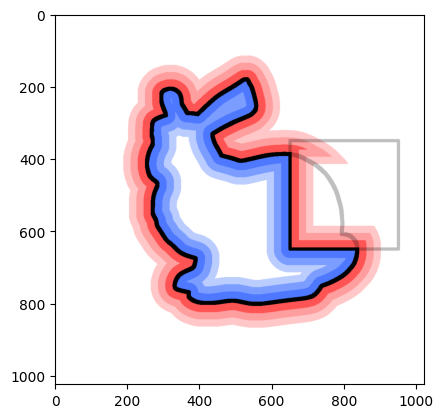

In [56]:
color = compute_color(np.maximum(bunny_dist, -box_dist))
plt.imshow(color)
plt.imsave(IMG_DIR + 'diff_sharp.png', color)

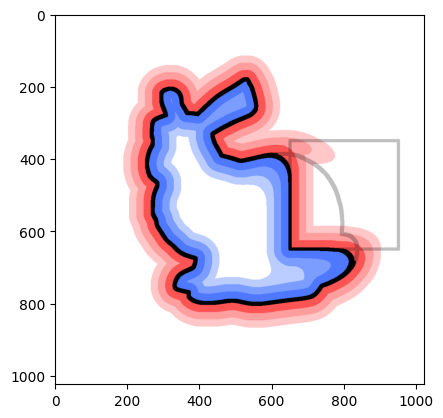

In [57]:
color = compute_color(-smooth_min(-bunny_dist, box_dist, BLENDING_RADIUS))
plt.imshow(color)
plt.imsave(IMG_DIR + 'diff_smooth.png', color)